In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.feature_extraction.text import TfidfVectorizer
import utils
import nltk
from os import getcwd
from nltk.corpus import twitter_samples 
from utils import process_tweet, build_freqs
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

from utilsnew import process_tweet, lookup 
import pdb
from nltk.corpus import stopwords, twitter_samples
import string
from nltk.tokenize import TweetTokenizer
from os import getcwd

# ***Quora  ***

In [2]:
df = pd.read_csv('/kaggle/input/quora-csv/Quora.csv')
#df = df.sample(frac=0.1, random_state=10)
print(df.shape)
df.head(20)

(10000, 2)


,question_text,target
0,Why most guys take advantage of nice girls in ...,1
1,How might Donald Trump be worse than the worst...,1
2,Do humans have more smart answers to dumb ques...,0
3,"Why Woody Allen makes allusions to Nietzsche, ...",0
4,What accounts for the fact that in our streets...,0
5,"With all of his offspring, Walter Frey must ha...",1
6,Is the Global Islamic Movement using Islamopho...,1
7,India is intruding terrorists into Pakistan & ...,1
8,Why is eating pork harem but sugar is not? The...,0
9,Why did Daniel Burros shot himself in the head...,1


In [3]:
# Drop NA
df.dropna(inplace=True)
print(df.shape)
df['target'].mean()

(10000, 2)


0.5

**1.  We have no missing values in our dataset .**

**2.  And our data is balanced .**


**---------------------------------  Bag Of Words  -------------------------------------**

In [4]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['question_text'], 
                                                    df['target'], 
                                                    random_state=0)
print('X_train first entry:\n\n', X_train.iloc[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry:

 As a Muslimah, what do you think about Muslim men’s right to rape captive women?


X_train shape:  (7500,)


In [5]:
# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)
vect.get_feature_names_out()[::1000]

array(['00', 'asleep', 'care', 'crossbows', 'elephants', 'generic',
       'industrialization', 'logos', 'nibiru', 'possessively', 'rid',
       'sparking', 'transiting', 'xhosa'], dtype=object)

In [6]:
len(vect.get_feature_names_out()) 

13104

In [7]:
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=1000)

In [8]:
# Predict the transformed test documents
predictions = model.predict(vect.transform(X_test))

#Scores of Bag of Words 
BoW_AUC=round(roc_auc_score(y_test,predictions),3)
BoW_ACC=round(accuracy_score(y_test,predictions),3)
BoW_PREC=round(precision_score(y_test,predictions),3)
BoW_REC=round(recall_score(y_test,predictions),3)
BoW_F1_Score=round(f1_score(y_test,predictions),3)

#Printing all the scores

print('The Bag of Words AUC score is: ',BoW_AUC )
print('The Bag of Words Accuracy score is: ',BoW_ACC )
print('The Bag of Words Precision score is: ', BoW_PREC)
print('The Bag of Words Recall score is: ', BoW_REC)
print('The Bag of Words F1 score is: ', BoW_F1_Score)

The Bag of Words AUC score is:  0.836
The Bag of Words Accuracy score is:  0.837
The Bag of Words Precision score is:  0.842
The Bag of Words Recall score is:  0.813
The Bag of Words F1 score is:  0.827


In [9]:
roc_pred_BoW=model.predict_proba(vect.transform(X_test))
False_pr_BoW,True_pr_BoW, _ =roc_curve(y_test,roc_pred_BoW[:, 1])
ROC_AUC_BoW=auc(False_pr_BoW,True_pr_BoW)

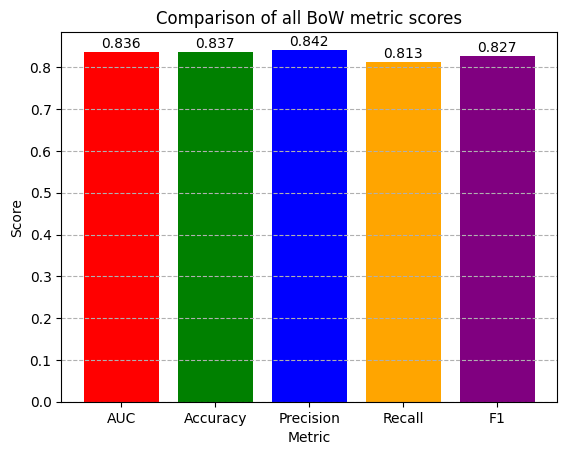

In [10]:
variables=['AUC','Accuracy','Precision','Recall','F1']
values=[BoW_AUC,BoW_ACC,BoW_PREC,BoW_REC,BoW_F1_Score]
colors = ['red', 'green', 'blue', 'orange', 'purple']
plt.bar(variables, values, color=colors)

for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(v), color='black', ha='center')
    
plt.grid(axis='y',linestyle='--')
plt.title('Comparison of all BoW metric scores')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.show()

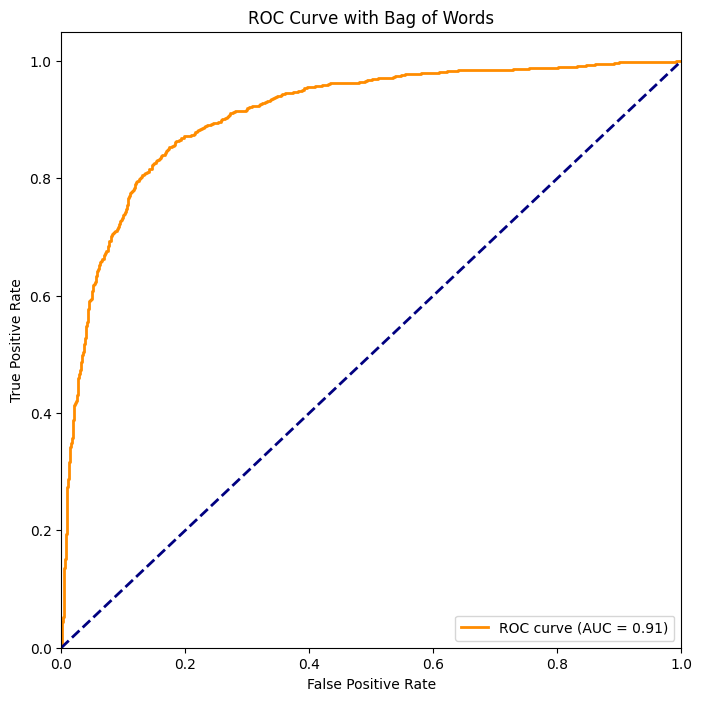

In [11]:
# Plotting the ROC curve ( Bag of Words )
plt.figure(figsize=(8, 8))
plt.plot(False_pr_BoW, True_pr_BoW, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(ROC_AUC_BoW))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Bag of Words')
plt.legend(loc='lower right')
plt.show()

In [12]:
feature_names = np.array(vect.get_feature_names_out())
sorted_coef_index = model.coef_[0].argsort()
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['what' 'verbal' 'dating' 'change' 'friends' '2017' 'possible' 'though'
 'successful' 'safe']

Largest Coefs: 
['atheists' 'girls' 'liberals' 'white' 'incest' 'women' 'obama' 'muslims'
 'israel' 'chinese']


**---------------------------------  TF-IDF  -------------------------------------**

In [13]:
vect = TfidfVectorizer(min_df=5).fit(X_train)
len(vect.get_feature_names_out())
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

In [14]:
roc_pred_TF_IDF=model.predict_proba(vect.transform(X_test))
False_pr_TF_IDF,True_pr_TF_IDF, _ =roc_curve(y_test,roc_pred_TF_IDF[:, 1])
ROC_AUC_TF_IDF=auc(False_pr_TF_IDF,True_pr_TF_IDF)

In [15]:
#Scores of TF_IDF
TF_IDF_AUC=round(roc_auc_score(y_test,predictions),3)
TF_IDF_ACC=round(accuracy_score(y_test,predictions),3)
TF_IDF_PREC=round(precision_score(y_test,predictions),3)
TF_IDF_REC=round(recall_score(y_test,predictions),3)
TF_IDF_F1_Score=round(f1_score(y_test,predictions),3)

#Printing all the scores 

print('The TF-IDF AUC score is: ',TF_IDF_AUC )
print('The TF-IDF Accuracy score is: ',TF_IDF_ACC )
print('The TF-IDF Precision score is: ', TF_IDF_PREC)
print('The TF-IDF Recall score is: ', TF_IDF_REC)
print('The TF-IDF F1 score is: ', TF_IDF_F1_Score)

The TF-IDF AUC score is:  0.833
The TF-IDF Accuracy score is:  0.834
The TF-IDF Precision score is:  0.825
The TF-IDF Recall score is:  0.83
The TF-IDF F1 score is:  0.828


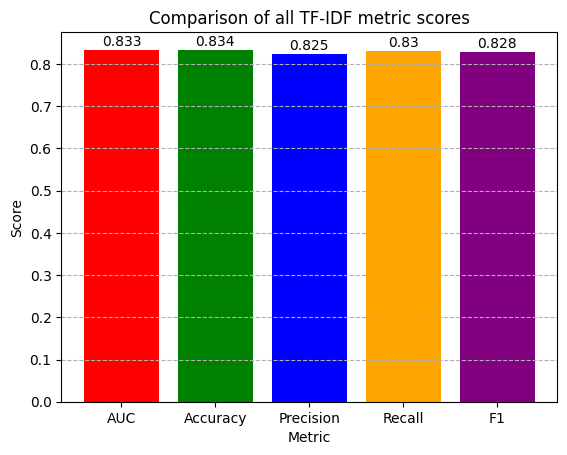

In [16]:
variables=['AUC','Accuracy','Precision','Recall','F1']
values=[TF_IDF_AUC,TF_IDF_ACC,TF_IDF_PREC,TF_IDF_REC,TF_IDF_F1_Score]
colors = ['red', 'green', 'blue', 'orange', 'purple']
plt.bar(variables, values, color=colors)

for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(v), color='black', ha='center')
    
plt.grid(axis='y',linestyle='--')
plt.title('Comparison of all TF-IDF metric scores')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.show()

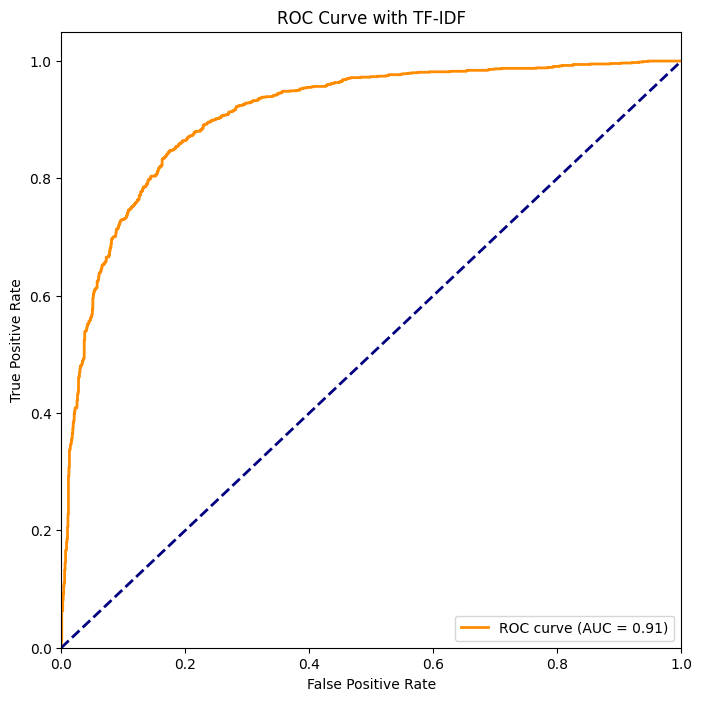

In [17]:
# Plotting the ROC curve ( TF-IDF )
plt.figure(figsize=(8, 8))
plt.plot(False_pr_TF_IDF, True_pr_TF_IDF, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(ROC_AUC_TF_IDF))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with TF-IDF')
plt.legend(loc='lower right')
plt.show()

In [18]:
feature_names = np.array(vect.get_feature_names_out())

sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest tfidf:
['streets' 'refuse' 'chosen' 'several' 'cant' 'fine' 'potentially'
 'entire' 'shy' 'unless']

Largest tfidf: 
['which' 'is' 'nepal' 'sisters' 'are' 'gay' 'lord' 'dying' 'alien'
 'greece']


In [19]:
sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))
print(model.predict(vect.transform(['sincere',
                                    'insincere'])))

Smallest Coefs:
['what' 'how' 'which' 'in' 'best' 'possible' 'you' 'can' 'one' 'is']

Largest Coefs: 
['women' 'trump' 'girls' 'muslims' 'white' 'indians' 'quora' 'liberals'
 'chinese' 'why']
[0 0]


**---------------------------------  N-Grams  -------------------------------------**

In [20]:
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names_out())

4280

In [21]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

roc_pred_NGRM=model.predict_proba(vect.transform(X_test))
False_pr_NGRM,True_pr_NGRM, _ =roc_curve(y_test,roc_pred_NGRM[:, 1])
ROC_AUC_NGRM=auc(False_pr_NGRM,True_pr_NGRM)

#Scores of N-Grams
NGRM_AUC=round(roc_auc_score(y_test,predictions),3)
NGRM_ACC=round(accuracy_score(y_test,predictions),3)
NGRM_PREC=round(precision_score(y_test,predictions),3)
NGRM_REC=round(recall_score(y_test,predictions),3)
NGRM_F1_Score=round(f1_score(y_test,predictions),3)

#Printing all the scores 

print('The N-Grams AUC score is: ',NGRM_AUC )
print('The N-Grams Accuracy score is: ',NGRM_ACC )
print('The N-Grams Precision score is: ', NGRM_PREC)
print('The N-Grams Recall score is: ', NGRM_REC)
print('The N-Grams F1 score is: ', NGRM_F1_Score)



The N-Grams AUC score is:  0.831
The N-Grams Accuracy score is:  0.832
The N-Grams Precision score is:  0.842
The N-Grams Recall score is:  0.801
The N-Grams F1 score is:  0.821


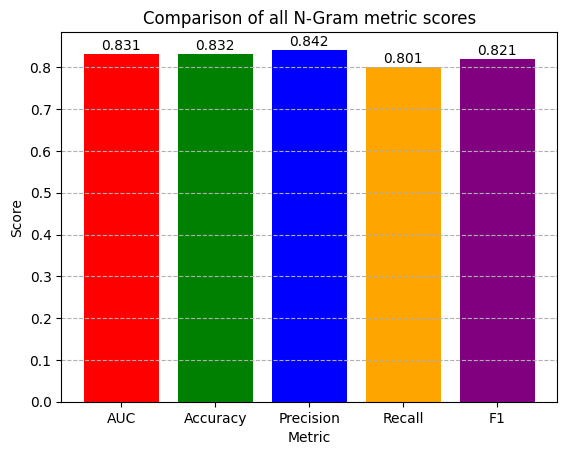

In [22]:
variables=['AUC','Accuracy','Precision','Recall','F1']
values=[NGRM_AUC,NGRM_ACC,NGRM_PREC,NGRM_REC,NGRM_F1_Score]
colors = ['red', 'green', 'blue', 'orange', 'purple']
plt.bar(variables, values, color=colors)

for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(v), color='black', ha='center')
    
plt.grid(axis='y',linestyle='--')
plt.title('Comparison of all N-Gram metric scores')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.show()

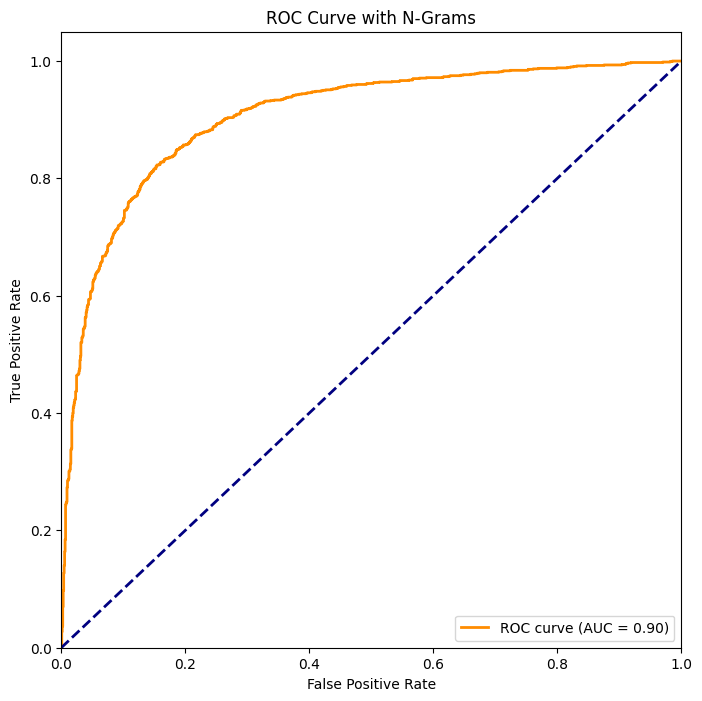

In [23]:
# Plotting the ROC curve ( N-Grams )
plt.figure(figsize=(8, 8))
plt.plot(False_pr_NGRM, True_pr_NGRM, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(ROC_AUC_NGRM))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with N-Grams')
plt.legend(loc='lower right')
plt.show()

In [24]:
feature_names = np.array(vect.get_feature_names_out())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['the black' 'the human' 'for their' 'what are' 'change' 'mumbai'
 'received' 'friends' '2017' 'anywhere']

Largest Coefs: 
['atheists' 'girls' 'liberals' 'women' 'incest' 'muslim' 'white' 'fuck'
 'racist' 'muslims']


**---------------------------------  Logistic Regresion  -------------------------------------**

In [25]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
df_new = pd.read_csv('/kaggle/input/quora-csv/Quora.csv')
df_insincere = df_new[df_new['target'] == 1]
df_sincere = df_new[df_new['target'] == 0]
print(df_insincere.describe)
print(df_sincere.describe)

<bound method NDFrame.describe of                                           question_text  target
0     Why most guys take advantage of nice girls in ...       1
1     How might Donald Trump be worse than the worst...       1
5     With all of his offspring, Walter Frey must ha...       1
6     Is the Global Islamic Movement using Islamopho...       1
7     India is intruding terrorists into Pakistan & ...       1
...                                                 ...     ...
9990  Can I somehow block all the content from India...       1
9995  I've read from websites about guys that women ...       1
9996                           How do I seduce my aunt?       1
9998                       How do I quit being Chinese?       1
9999  Why do girls say they want a nice guy then go ...       1

[5000 rows x 2 columns]>
<bound method NDFrame.describe of                                           question_text  target
2     Do humans have more smart answers to dumb ques...       0
3     Why 

In [27]:
all_insincere = df_new[df_new['target'] == 1]['question_text'].tolist()
all_sincere = df_new[df_new['target'] == 0]['question_text'].tolist()
test_pos = all_insincere[4000:]
train_pos = all_insincere[:4000]
test_neg = all_sincere[4000:]
train_neg = all_sincere[:4000]

train_x = train_pos + train_neg 
test_x = test_pos + test_neg

train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

print("train_y.shape = " + str(train_y.shape))
print("test_y.shape = " + str(test_y.shape))
freqs = build_freqs(train_x, train_y)

print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

train_y.shape = (8000, 1)
test_y.shape = (2000, 1)
type(freqs) = <class 'dict'>
len(freqs) = 13427


In [28]:
def extract_features(tweet, freqs):
    word_l = process_tweet(tweet)    
    x = np.zeros((1, 3))    
    x[0,0] = 1     
    for word in word_l:        
        x[0,1] += freqs.get((word, 1.0),0)        
        x[0,2] += freqs.get((word, 0.0),0)
        
    assert(x.shape == (1, 3))
    return x

In [29]:
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

Y = train_y

In [30]:
clf = LogisticRegression(random_state=0)
clf.fit(X, Y.ravel())

LogisticRegression(random_state=0)

In [31]:
X_te = np.zeros((len(test_x), 3))
for i in range(len(test_x)):
    X_te[i, :]= extract_features(test_x[i], freqs)

Y_te = test_y

In [32]:

y_pred = clf.predict(X_te)

roc_pred_LOG=clf.predict_proba(X_te)
False_pr_LOG,True_pr_LOG, _ =roc_curve(Y_te,roc_pred_LOG[:, 1])
ROC_AUC_LOG=auc(False_pr_LOG,True_pr_LOG)

#Scores of Logistic Regression

LOG_AUC=round(roc_auc_score(Y_te, y_pred),3)
LOG_ACC=round(accuracy_score(Y_te, y_pred),3)
LOG_PREC=round(precision_score(Y_te, y_pred),3)
LOG_REC=round(recall_score(Y_te, y_pred),3)
LOG_F1_Score=round(f1_score(Y_te, y_pred),3)

#Printing all the scores 

print('The Logistic Regression AUC score is: ',LOG_AUC )
print('The Logistic Regression Accuracy score is: ',LOG_ACC )
print('The Logistic Regression Precision score is: ', LOG_PREC)
print('The Logistic Regression Recall score is: ', LOG_REC)
print('The Logistic Regression F1 score is: ', LOG_F1_Score)

conf_matrix = confusion_matrix(Y_te, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

The Logistic Regression AUC score is:  0.776
The Logistic Regression Accuracy score is:  0.776
The Logistic Regression Precision score is:  0.834
The Logistic Regression Recall score is:  0.688
The Logistic Regression F1 score is:  0.754
Confusion Matrix:
[[863 137]
 [312 688]]


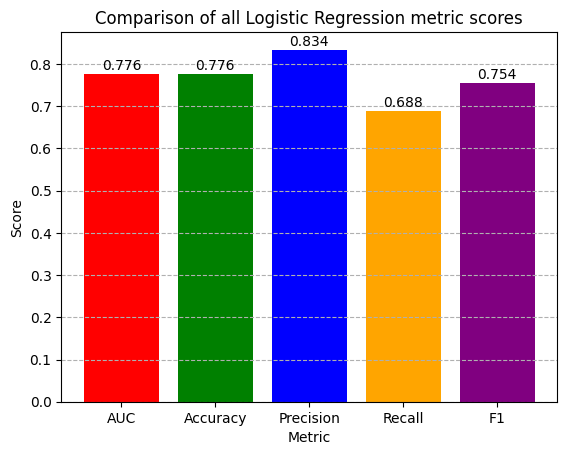

In [33]:
variables=['AUC','Accuracy','Precision','Recall','F1']
values=[LOG_AUC,LOG_ACC,LOG_PREC,LOG_REC,LOG_F1_Score]
colors = ['red', 'green', 'blue', 'orange', 'purple']
plt.bar(variables, values, color=colors)

for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(v), color='black', ha='center')
    
plt.grid(axis='y',linestyle='--')
plt.title('Comparison of all Logistic Regression metric scores')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.show()

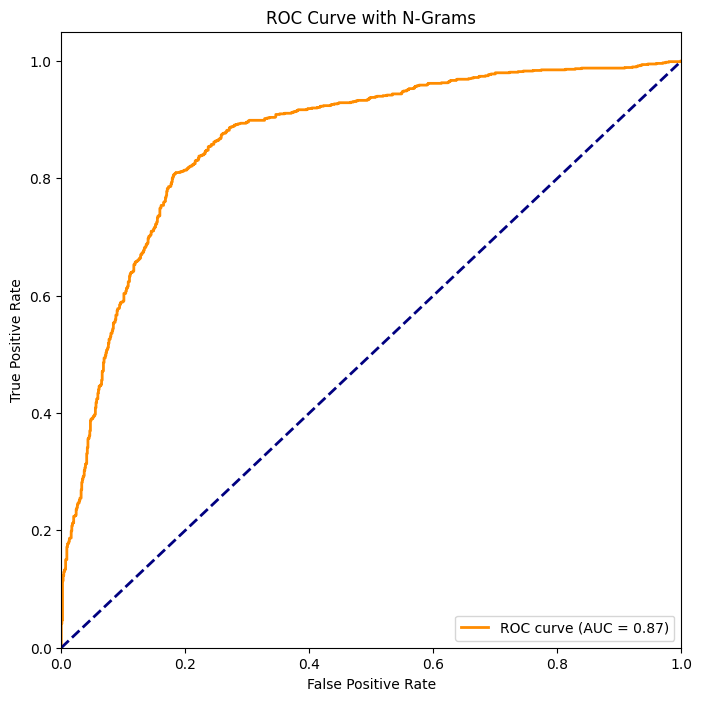

In [34]:
# Plotting the ROC curve ( Logistic Regression )
plt.figure(figsize=(8, 8))
plt.plot(False_pr_LOG, True_pr_LOG, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(ROC_AUC_LOG))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with N-Grams')
plt.legend(loc='lower right')
plt.show()

**---------------------------------  Naive Bayes  -------------------------------------**

In [35]:
filePath = f"/kaggle/input/quora-csv/Quora.csv"
nltk.data.path.append(filePath)

In [36]:
df = pd.read_csv('/kaggle/input/quora-csv/Quora.csv')

In [37]:
df_possitive = df[df['target'] == 1]
df_negative = df[df['target'] == 0]

In [38]:
test_pos = df_possitive[4000:]
train_pos = df_possitive[:4000]
test_neg = df_negative[4000:]
train_neg = df_negative[:4000]

test_pos =test_pos['question_text'].tolist()
train_pos =train_pos['question_text'].tolist()
test_neg =test_neg['question_text'].tolist()
train_neg =train_neg['question_text'].tolist()

train_x = train_pos + train_neg 
test_x = test_pos + test_neg

train_y = np.append(np.ones(len(train_pos)), np.zeros(len(train_neg)))
test_y = np.append(np.ones(len(test_pos)), np.zeros(len(test_neg)))

In [39]:
def count_tweets(result, tweets, ys):
    for y, tweet in zip(ys, tweets):
        for word in process_tweet(tweet):
            pair = (word,y)
            if pair in result:
                result[pair] += 1
            else:
                result[pair] = 1
    return result

In [40]:
result = {}
freqs = count_tweets(result, train_x, train_y)


In [41]:
def train_naive_bayes(freqs, train_x, train_y):

    loglikelihood = {}
    logprior = 0

    vocab = set([pair[0] for pair in freqs.keys()])
    V = len(vocab)

    N_pos = N_neg = 0
    for pair in freqs.keys():
        if pair[1] > 0:
            N_pos += freqs[pair]
        else:
            N_neg += freqs[pair]

    D = len(train_y)

    D_pos = (len(list(filter(lambda x: x > 0, train_y))))

    D_neg = (len(list(filter(lambda x: x <= 0, train_y))))

    logprior = np.log(D_pos) - np.log(D_neg)

    for word in vocab:
        freq_pos = lookup(freqs,word,1)
        freq_neg = lookup(freqs,word,0)

        p_w_pos = (freq_pos + 1) / (N_pos + V)
        p_w_neg = (freq_neg + 1) / (N_neg + V)

        loglikelihood[word] = np.log(p_w_pos/p_w_neg)

    return logprior, loglikelihood

In [42]:
logprior, loglikelihood = train_naive_bayes(freqs, train_x, train_y)
print(logprior)
print(len(loglikelihood))

0.0
10308


In [43]:
def naive_bayes_predict(tweet, logprior, loglikelihood):

    word_l = process_tweet(tweet)
    p = 0
    p += logprior

    for word in word_l:
        if word in loglikelihood:
            p += loglikelihood[word]

    return p

In [44]:
def get_ratio(freqs, word):

    pos_neg_ratio = {'positive': 0, 'negative': 0, 'ratio': 0.0}
    pos_neg_ratio['positive'] = lookup(freqs,word,1)

    pos_neg_ratio['negative'] = lookup(freqs,word,0)

    pos_neg_ratio['ratio'] = (pos_neg_ratio['positive'] + 1)/(pos_neg_ratio['negative'] + 1)
    return pos_neg_ratio

In [45]:
def get_words_by_threshold(freqs, label, threshold):

    word_list = {}

    for key in freqs.keys():
        word, _ = key
        pos_neg_ratio = get_ratio(freqs, word)
        if label == 1 and pos_neg_ratio['ratio'] >= threshold:
            word_list[word] = pos_neg_ratio
        elif label == 0 and pos_neg_ratio['ratio'] <= threshold:
            word_list[word] = pos_neg_ratio
    return word_list


In [46]:
def test_naive_bayes(test_x, test_y, logprior, loglikelihood):

    accuracy = 0  
    y_hats = []
    proba=[]
    for tweet in test_x:
        if naive_bayes_predict(tweet, logprior, loglikelihood) > 0:
            y_hat_i = 1
        else:
            y_hat_i = 0

        y_hats.append(y_hat_i)
    
        proba.append(naive_bayes_predict(tweet, logprior, loglikelihood))
        

    error = np.mean(np.absolute(y_hats-test_y))
    

    accuracy = 1-error
    prediction=y_hats
    roc_pred_NB=proba

    return prediction,roc_pred_NB


In [47]:
prediction,roc_pred_NB=np.array(test_naive_bayes(test_x, test_y, logprior, loglikelihood))

In [48]:

False_pr_NB,True_pr_NB, _ =roc_curve(test_y,roc_pred_NB)
ROC_AUC_NB=auc(False_pr_NB,True_pr_NB)

#Scores of Naive Bayes

NB_AUC=round(roc_auc_score(test_y,prediction),3)
NB_ACC=round(accuracy_score(test_y,prediction),3)
NB_PREC=round(precision_score(test_y,prediction),3)
NB_REC=round(recall_score(test_y,prediction),3)
NB_F1_Score=round(f1_score(test_y,prediction),3)

#Printing all the scores 

print('The Naive Bayes AUC score is: ',NB_AUC )
print('The Naive Bayes Accuracy score is: ',NB_ACC )
print('The Naive Bayes Precision score is: ', NB_PREC)
print('The Naive Bayes Recall score is: ', NB_REC)
print('The Naive Bayes F1 score is: ', NB_F1_Score)

The Naive Bayes AUC score is:  0.816
The Naive Bayes Accuracy score is:  0.816
The Naive Bayes Precision score is:  0.77
The Naive Bayes Recall score is:  0.902
The Naive Bayes F1 score is:  0.831


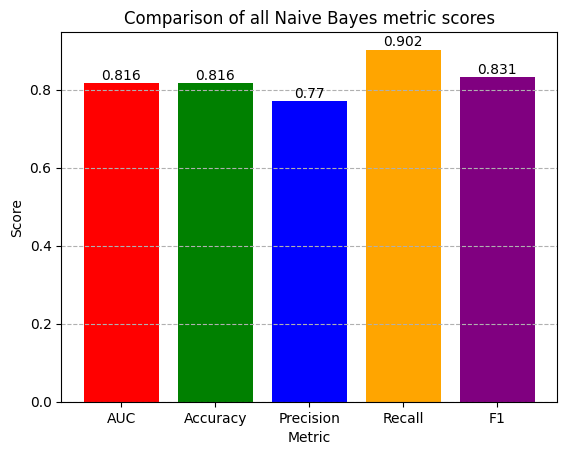

In [49]:
variables=['AUC','Accuracy','Precision','Recall','F1']
values=[NB_AUC,NB_ACC,NB_PREC,NB_REC,NB_F1_Score]
colors = ['red', 'green', 'blue', 'orange', 'purple']
plt.bar(variables, values, color=colors)

for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(v), color='black', ha='center')
    
plt.grid(axis='y',linestyle='--')
plt.title('Comparison of all Naive Bayes metric scores')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.show()

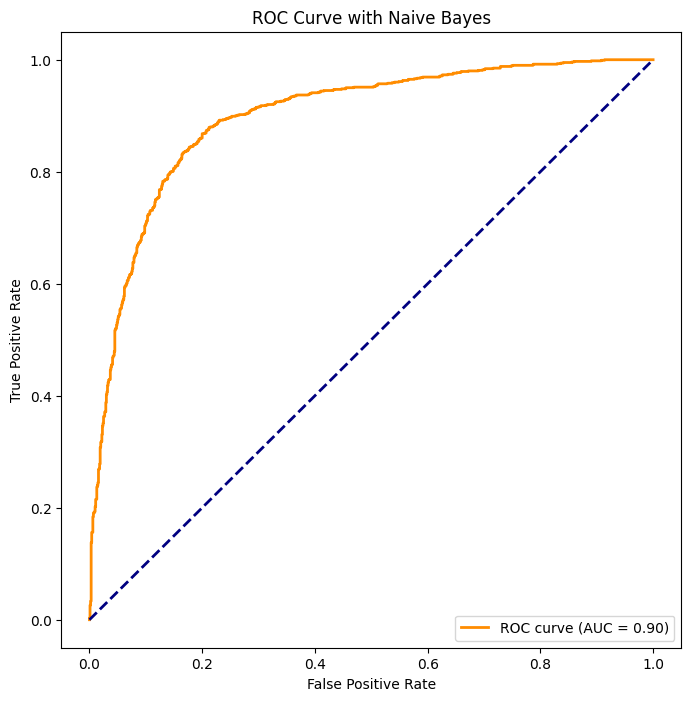

In [50]:
# Plotting the ROC curve ( Naive Bayes )
plt.figure(figsize=(8, 8))
plt.plot(False_pr_NB, True_pr_NB, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(ROC_AUC_NB))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Naive Bayes')
plt.legend(loc='lower right')
plt.show()

# **Plotting all Metrics**

**1. ROC CURVES**

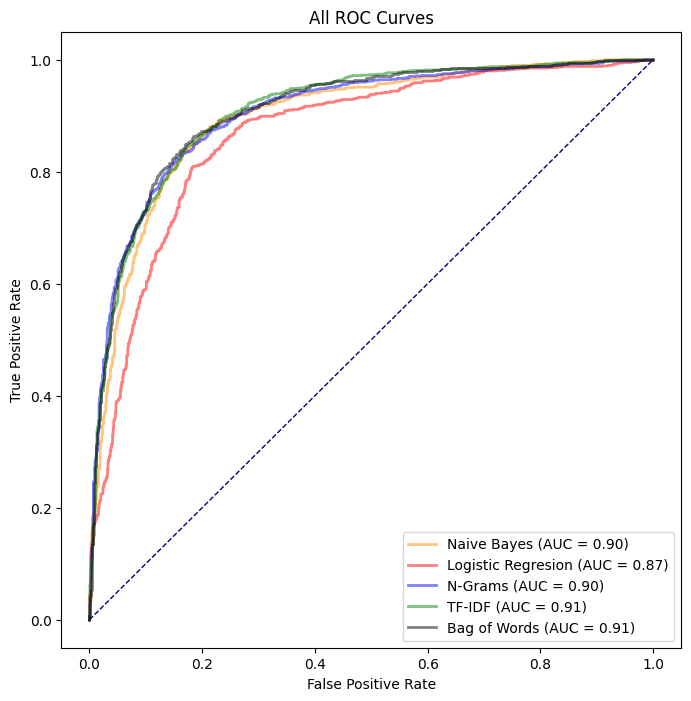

In [51]:

plt.figure(figsize=(8, 8))
plt.plot(False_pr_NB, True_pr_NB, color='darkorange', lw=2, label='Naive Bayes (AUC = {:.2f})'.format(ROC_AUC_NB) , alpha=0.5)
plt.plot(False_pr_LOG, True_pr_LOG, color='red', lw=2, label='Logistic Regresion (AUC = {:.2f})'.format(ROC_AUC_LOG), alpha=0.5)
plt.plot(False_pr_NGRM, True_pr_NGRM, color='blue', lw=2, label='N-Grams (AUC = {:.2f})'.format(ROC_AUC_NGRM), alpha=0.5)
plt.plot(False_pr_TF_IDF, True_pr_TF_IDF, color='green', lw=2, label='TF-IDF (AUC = {:.2f})'.format(ROC_AUC_TF_IDF), alpha=0.5)
plt.plot(False_pr_BoW, True_pr_BoW, color='black', lw=2, label='Bag of Words (AUC = {:.2f})'.format(ROC_AUC_BoW), alpha=0.5)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('All ROC Curves')
plt.legend(loc='lower right')
plt.show()

**2.Comparison of all Accuracy , Precision , Recall and F1 scores**

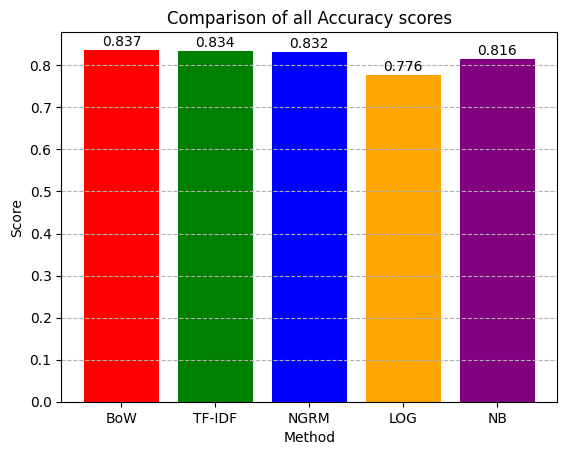

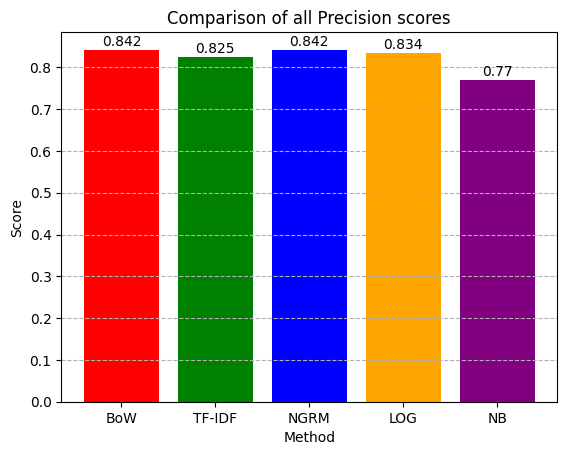

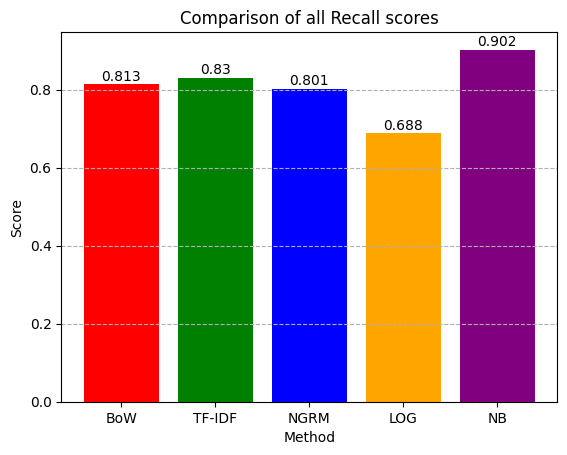

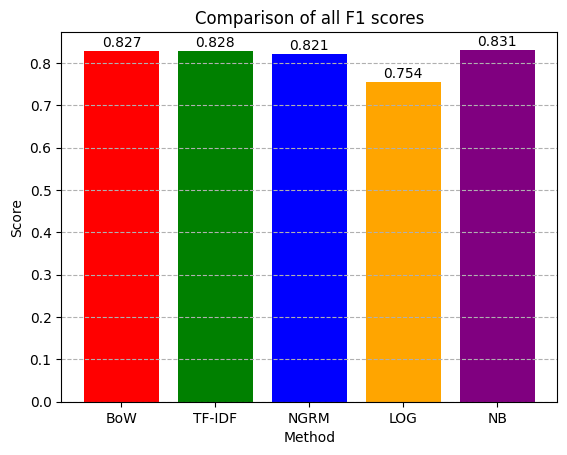

In [52]:
# Accuracy 
variables=['BoW','TF-IDF','NGRM','LOG','NB']
values=[BoW_ACC,TF_IDF_ACC,NGRM_ACC,LOG_ACC,NB_ACC]
colors = ['red', 'green', 'blue', 'orange', 'purple']
plt.bar(variables, values, color=colors)

for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(v), color='black', ha='center')
    
plt.grid(axis='y',linestyle='--')
plt.title('Comparison of all Accuracy scores')
plt.xlabel('Method')
plt.ylabel('Score')
plt.show()

#Precision

variables=['BoW','TF-IDF','NGRM','LOG','NB']
values=[BoW_PREC,TF_IDF_PREC,NGRM_PREC,LOG_PREC,NB_PREC]
colors = ['red', 'green', 'blue', 'orange', 'purple']
plt.bar(variables, values, color=colors)

for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(v), color='black', ha='center')
    
plt.grid(axis='y',linestyle='--')
plt.title('Comparison of all Precision scores')
plt.xlabel('Method')
plt.ylabel('Score')
plt.show()

#Recall

variables=['BoW','TF-IDF','NGRM','LOG','NB']
values=[BoW_REC,TF_IDF_REC,NGRM_REC,LOG_REC,NB_REC]
colors = ['red', 'green', 'blue', 'orange', 'purple']
plt.bar(variables, values, color=colors)

for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(v), color='black', ha='center')
    
plt.grid(axis='y',linestyle='--')
plt.title('Comparison of all Recall scores')
plt.xlabel('Method')
plt.ylabel('Score')
plt.show()

#F1 scores

variables=['BoW','TF-IDF','NGRM','LOG','NB']
values=[BoW_F1_Score,TF_IDF_F1_Score,NGRM_F1_Score,LOG_F1_Score,NB_F1_Score]
colors = ['red', 'green', 'blue', 'orange', 'purple']
plt.bar(variables, values, color=colors)

for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(v), color='black', ha='center')
    
plt.grid(axis='y',linestyle='--')
plt.title('Comparison of all F1 scores')
plt.xlabel('Method')
plt.ylabel('Score')
plt.show()

****Quora 4 ****

**C-BoW**

In [53]:

import emoji
import re
import sys
import pandas as pd 
import nltk 
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import numpy as np
from utils3 import get_dict
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
import itertools
import numpy as np
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [54]:
!pip install emoji==1.4.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.1/185.1 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.4.1-py3-none-any.whl size=186377 sha256=e49044e7f5cfa65f4a3b7c8d04992fbb635944b183bb0ceb26b871564d6bc9dc
  Stored in directory: /root/.cache/pip/wheels/b1/11/f1/1c0f37684bccd7d6f6176e7a3ababcc3070d77608922259974
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.14.1
    Uninstalling emoji-2.14.1:
      Successfully uninstalled emoji-2.14.1


In [55]:
nltk.download('punkt', quiet=True)
np.random.seed(0)

In [56]:
def tokenize(corpus):
    data = re.sub(r'[,!?;-]+', '.', corpus)
    data = nltk.word_tokenize(data)  
    data = [ch.lower() for ch in data
            if ch.isalpha() or ch == '.' or emoji.emoji_count(ch) > 0
    ]
    return data

In [57]:
df=pd.read_csv('/kaggle/input/quora-csv/Quora.csv')
df.head()

,question_text,target
0,Why most guys take advantage of nice girls in ...,1
1,How might Donald Trump be worse than the worst...,1
2,Do humans have more smart answers to dumb ques...,0
3,"Why Woody Allen makes allusions to Nietzsche, ...",0
4,What accounts for the fact that in our streets...,0


In [58]:
list_of_texts=df['question_text'].tolist()
list_of_texts[:3]


['Why most guys take advantage of nice girls in a relationship or even at work?',
 'How might Donald Trump be worse than the worst person that most people have ever known?',
 'Do humans have more smart answers to dumb questions, or dumb answers to smart questions?']

In [59]:
list_of_tokenized_texts=[tokenize(i) for i in list_of_texts]
print(list_of_tokenized_texts[:3])


[['why', 'most', 'guys', 'take', 'advantage', 'of', 'nice', 'girls', 'in', 'a', 'relationship', 'or', 'even', 'at', 'work', '.'], ['how', 'might', 'donald', 'trump', 'be', 'worse', 'than', 'the', 'worst', 'person', 'that', 'most', 'people', 'have', 'ever', 'known', '.'], ['do', 'humans', 'have', 'more', 'smart', 'answers', 'to', 'dumb', 'questions', '.', 'or', 'dumb', 'answers', 'to', 'smart', 'questions', '.']]


In [60]:
model=Word2Vec(list_of_tokenized_texts,window=2,vector_size=3,alpha=0.03,epochs=5,cbow_mean=1,min_count=0,sg=0)

In [61]:
df['embeddings'] = df['question_text'].apply(lambda x: model.wv[tokenize(str(x))].mean(axis=0))
expanded_df = pd.DataFrame(df['embeddings'].tolist(), columns=[f"embedding_{i}" for i in range(3)])
df = pd.concat([df, expanded_df], axis=1).drop('embeddings', axis=1)
df

,question_text,target,embedding_0,embedding_1,embedding_2
0,Why most guys take advantage of nice girls in ...,1,-1.103376,2.711098,2.974453
1,How might Donald Trump be worse than the worst...,1,-0.931811,2.898560,3.023750
2,Do humans have more smart answers to dumb ques...,0,-0.444726,2.562336,2.662590
3,"Why Woody Allen makes allusions to Nietzsche, ...",0,-0.685310,2.090323,2.102338
4,What accounts for the fact that in our streets...,0,-0.850905,2.412861,2.138012
...,...,...,...,...,...
9995,I've read from websites about guys that women ...,1,-0.718016,2.879041,2.960265
9996,How do I seduce my aunt?,1,0.087786,2.255489,4.085293
9997,If you register to donate your organs upon you...,0,-0.623546,2.453984,2.723613
9998,How do I quit being Chinese?,1,-0.167286,2.607814,4.351330


In [62]:
X=df[['embedding_0','embedding_1','embedding_2']]
y=df['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [63]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
LR_accuracy=accuracy_score(y_test,y_pred)
print("The accuracy of LR is :" ,LR_accuracy)

The accuracy of LR is : 0.5465


In [64]:
model=KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
KN_accuracy=accuracy_score(y_test,y_pred)
print("The accuracy of KNN is :" ,KN_accuracy)

The accuracy of KNN is : 0.628


In [65]:
model=SVC()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
SVC_accuracy=accuracy_score(y_test,y_pred)
print("The accuracy of SVC is :" ,SVC_accuracy)

The accuracy of SVC is : 0.6585


In [66]:
model=GradientBoostingClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
CBoW_accuracy=accuracy_score(y_test,y_pred)
CBoW_Prec=round(precision_score(y_test, y_pred),4)
CBoW_Recall=round(recall_score(y_test, y_pred),4)
CBoW_f1=round(f1_score(y_test, y_pred),4)
print("The accuracy of Gradient Boosting Classifier is :" ,CBoW_accuracy)

The accuracy of Gradient Boosting Classifier is : 0.674


In [67]:
CBoW_fpr, CBoW_tpr, _ = fpr,tpr,_=roc_curve(y_test,model.predict(X_test).ravel())
CBoW_roc_auc = auc(CBoW_fpr, CBoW_tpr)

In [68]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
RFC_accuracy=accuracy_score(y_test,y_pred)
print("The accuracy of Random Forest Classifier is :" ,RFC_accuracy)

The accuracy of Random Forest Classifier is : 0.6405


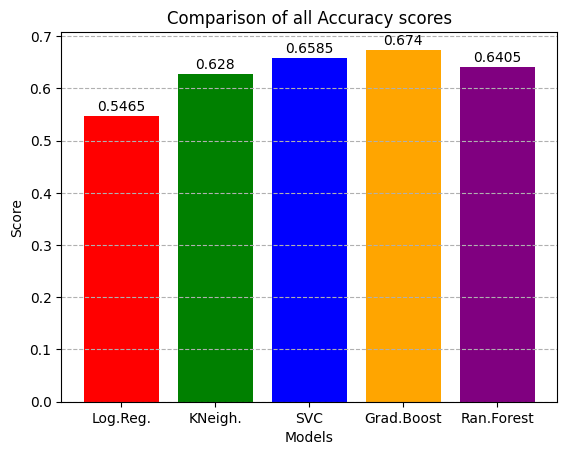

In [69]:
variables=['Log.Reg.','KNeigh.','SVC','Grad.Boost','Ran.Forest']
values=[LR_accuracy,KN_accuracy,SVC_accuracy,CBoW_accuracy,RFC_accuracy]
colors = ['red', 'green', 'blue', 'orange', 'purple']
plt.bar(variables, values, color=colors)

for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(v), color='black', ha='center')
    
plt.grid(axis='y',linestyle='--')
plt.title('Comparison of all Accuracy scores')
plt.xlabel('Models')
plt.ylabel('Score')
plt.show()

In [70]:
models={'LogisticRegression':LogisticRegression(),'KNeighborsClassifier':KNeighborsClassifier(),'SVC':SVC(probability=True),'RandomForestClassifier':RandomForestClassifier(),'GradientBoostingClassifier':GradientBoostingClassifier()}

In [71]:
ROC_Curves={}

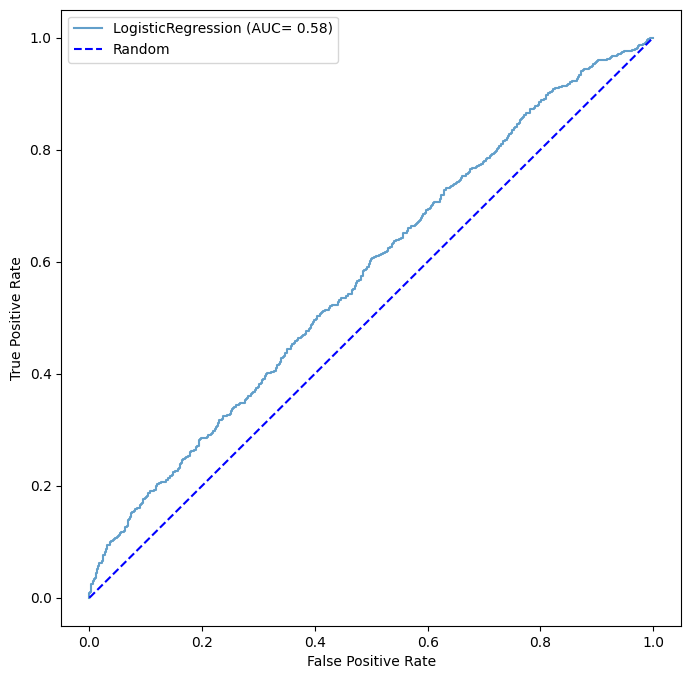

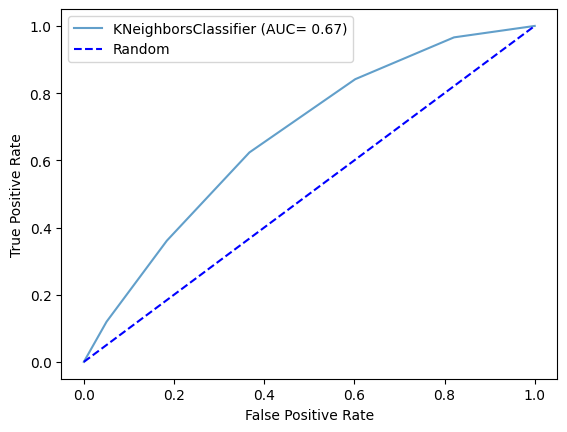

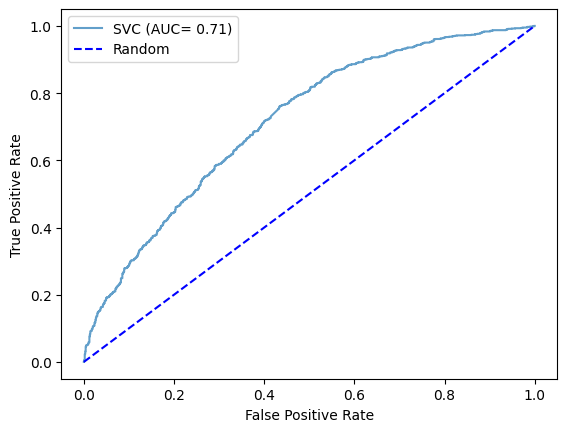

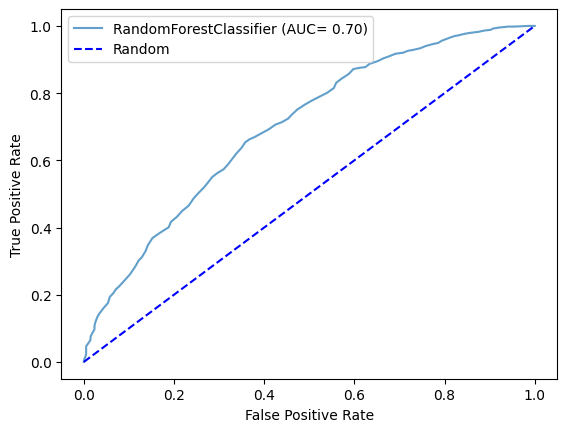

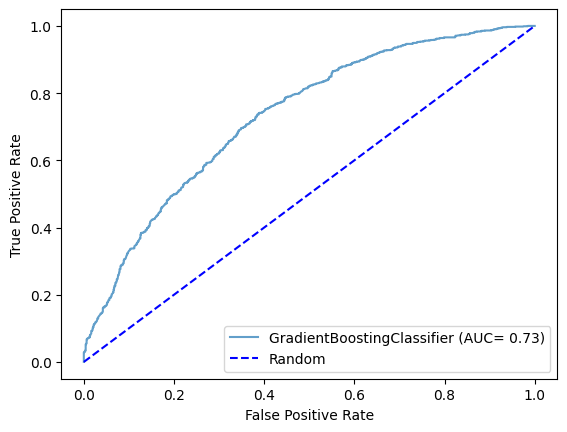

In [72]:
for model_name , model in models.items():
    model.fit(X_train,y_train)
    fpr,tpr,_=roc_curve(y_test,model.predict_proba(X_test)[:, 1])
    ROC_Curves[model_name]={'fpr': fpr , 'tpr': tpr}
    
plt.figure(figsize=(8,8))
for model_name ,ROC_data in  ROC_Curves.items():
    auc_score=auc(ROC_data['fpr'],ROC_data['tpr'])
    plt.plot(ROC_data['fpr'],ROC_data['tpr'],label=f'{model_name} (AUC= {auc_score:.2f})',alpha=0.7)
    
    plt.plot([0,1],[0,1], linestyle='--' , color='blue' , label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

**RNN**

In [73]:
import pandas as pd
from nltk import word_tokenize
import nltk
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input , Dense , LSTM , Embedding , SimpleRNN , GRU 
from keras.layers import Dropout , Activation , Bidirectional , GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers , regularizers , constraints, optimizers , layers
from tensorflow.keras.preprocessing.text import Tokenizer  #
from tensorflow.keras.preprocessing.sequence import pad_sequences # 
import tensorflow as tf
nltk.download('punkt')

df=pd.read_csv('/kaggle/input/quora-csv/Quora.csv')
df.dropna(inplace=True)
df['target']=df['target'].replace({1:True, 0:False})
df.head()

2025-06-01 09:26:57.949365: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748770018.190790      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748770018.267402      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/tmp/ipykernel_13/1218948592.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['tar

,question_text,target
0,Why most guys take advantage of nice girls in ...,True
1,How might Donald Trump be worse than the worst...,True
2,Do humans have more smart answers to dumb ques...,False
3,"Why Woody Allen makes allusions to Nietzsche, ...",False
4,What accounts for the fact that in our streets...,False


In [74]:
data=df['question_text'].map(word_tokenize).values
data[:2]

array([list(['Why', 'most', 'guys', 'take', 'advantage', 'of', 'nice', 'girls', 'in', 'a', 'relationship', 'or', 'even', 'at', 'work', '?']),
       list(['How', 'might', 'Donald', 'Trump', 'be', 'worse', 'than', 'the', 'worst', 'person', 'that', 'most', 'people', 'have', 'ever', 'known', '?'])],
      dtype=object)

In [75]:
total_vocabulary=set(word.lower() for text in data for word in text)
list(total_vocabulary)[:2]

['panties', 'bribed']

In [76]:
print(len(total_vocabulary))

16232


In [77]:
y=df['target'].values

In [78]:
tokenizer = Tokenizer(num_words=10000) #
tokenizer.fit_on_texts(list(df['question_text']))
tokenized_texts=tokenizer.texts_to_sequences(df['question_text'])
X =pad_sequences(tokenized_texts, maxlen=100)

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Sequential()
embedding_size = 128
model.add(Embedding(len(total_vocabulary), embedding_size))
model.add(LSTM(25, return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

2025-06-01 09:27:14.466017: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [80]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.6048 - loss: 0.6496 - val_accuracy: 0.8425 - val_loss: 0.3814
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.8779 - loss: 0.3290 - val_accuracy: 0.8100 - val_loss: 0.4145
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.9217 - loss: 0.2434 - val_accuracy: 0.8438 - val_loss: 0.4384
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.9622 - loss: 0.1385 - val_accuracy: 0.8475 - val_loss: 0.4778
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.9664 - loss: 0.1120 - val_accuracy: 0.8475 - val_loss: 0.5905
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.9741 - loss: 0.0830 - val_accuracy: 0.8388 - val_loss: 0.7009
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.9820 - loss: 0.0640 - val_accuracy: 0.8325 - val_loss: 0.8236
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.9860 - loss: 0.0516 - val

In [82]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
y_pred = model.predict(X_test).flatten()
y_pred = (y_pred > 0.5).astype(int)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Accuracy: 0.8085
Precision: 0.7970
Recall: 0.8158
F1 Score: 0.8063
Confusion Matrix:
[[820 203]
 [180 797]]


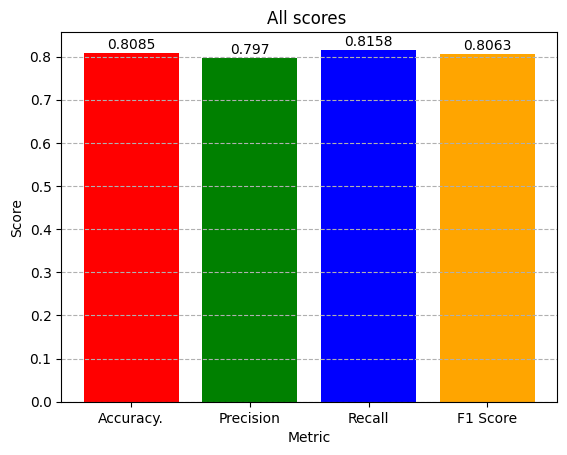

In [83]:
RNN_Accu=round(accuracy_score(y_test, y_pred),4)
RNN_Prec=round(precision_score(y_test, y_pred),4)
RNN_Recall=round(recall_score(y_test, y_pred),4)
RNN_f1=round(f1_score(y_test, y_pred),4)


variables=['Accuracy.','Precision','Recall','F1 Score']
values=[RNN_Accu,RNN_Prec,RNN_Recall,RNN_f1]
colors = ['red', 'green', 'blue', 'orange']
plt.bar(variables, values, color=colors)

for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(v), color='black', ha='center')
    
plt.grid(axis='y',linestyle='--')
plt.title('All scores ')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


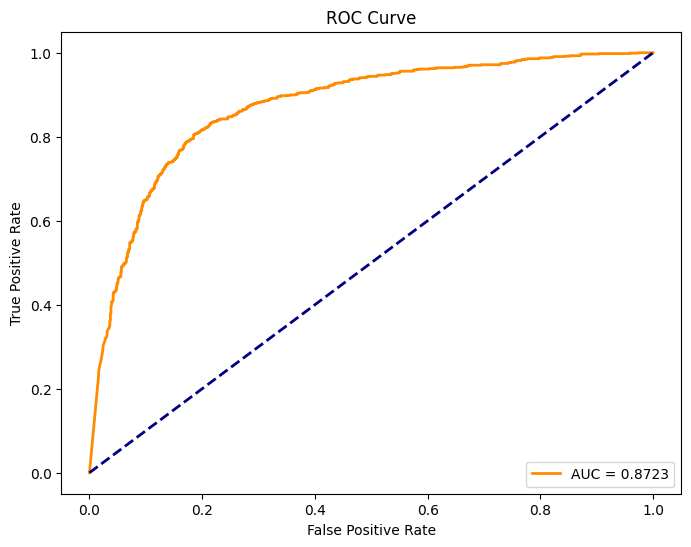

In [84]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_prob = model.predict(X_test).ravel()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Last Comparison of all metrics : Accuracy , Precision , Recall and F1 scores**

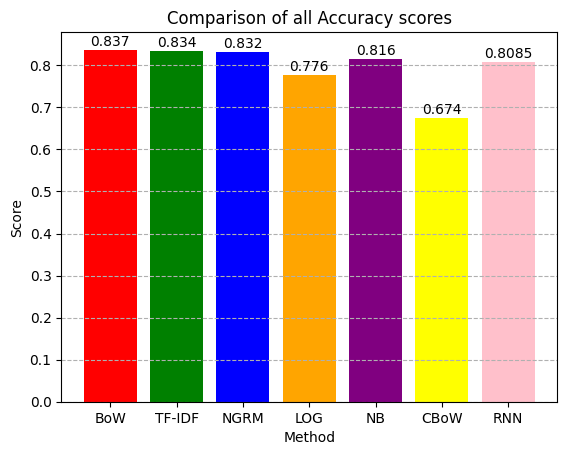

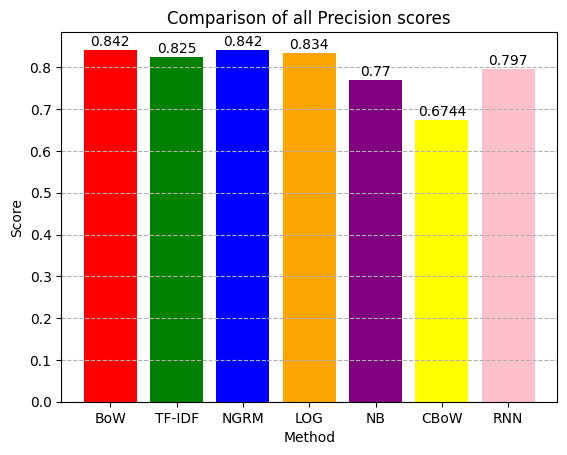

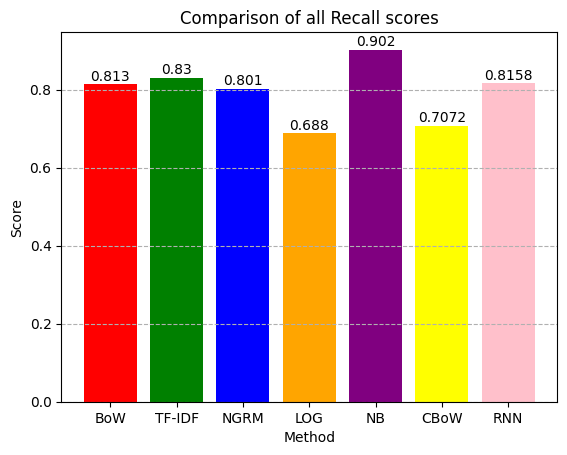

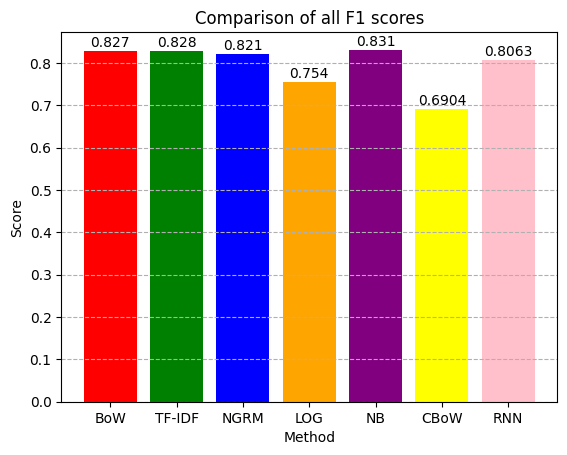

In [85]:
# Accuracy 
variables=['BoW','TF-IDF','NGRM','LOG','NB','CBoW','RNN']
values=[BoW_ACC,TF_IDF_ACC,NGRM_ACC,LOG_ACC,NB_ACC,CBoW_accuracy,RNN_Accu]
colors = ['red', 'green', 'blue', 'orange', 'purple','yellow','pink']
plt.bar(variables, values, color=colors)

for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(v), color='black', ha='center')
    
plt.grid(axis='y',linestyle='--')
plt.title('Comparison of all Accuracy scores')
plt.xlabel('Method')
plt.ylabel('Score')
plt.show()

#Precision

variables=['BoW','TF-IDF','NGRM','LOG','NB','CBoW','RNN']
values=[BoW_PREC,TF_IDF_PREC,NGRM_PREC,LOG_PREC,NB_PREC,CBoW_Prec,RNN_Prec]
colors = ['red', 'green', 'blue', 'orange', 'purple','yellow','pink']
plt.bar(variables, values, color=colors)

for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(v), color='black', ha='center')
    
plt.grid(axis='y',linestyle='--')
plt.title('Comparison of all Precision scores')
plt.xlabel('Method')
plt.ylabel('Score')
plt.show()

#Recall

variables=['BoW','TF-IDF','NGRM','LOG','NB','CBoW','RNN']
values=[BoW_REC,TF_IDF_REC,NGRM_REC,LOG_REC,NB_REC,CBoW_Recall,RNN_Recall]
colors = ['red', 'green', 'blue', 'orange', 'purple','yellow','pink']
plt.bar(variables, values, color=colors)

for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(v), color='black', ha='center')
    
plt.grid(axis='y',linestyle='--')
plt.title('Comparison of all Recall scores')
plt.xlabel('Method')
plt.ylabel('Score')
plt.show()

#F1 scores

variables=['BoW','TF-IDF','NGRM','LOG','NB','CBoW','RNN']
values=[BoW_F1_Score,TF_IDF_F1_Score,NGRM_F1_Score,LOG_F1_Score,NB_F1_Score,CBoW_f1,RNN_f1]
colors = ['red', 'green', 'blue', 'orange', 'purple','yellow','pink']
plt.bar(variables, values, color=colors)

for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(v), color='black', ha='center')
    
plt.grid(axis='y',linestyle='--')
plt.title('Comparison of all F1 scores')
plt.xlabel('Method')
plt.ylabel('Score')
plt.show()

****Comparison of all ROC Curves ****

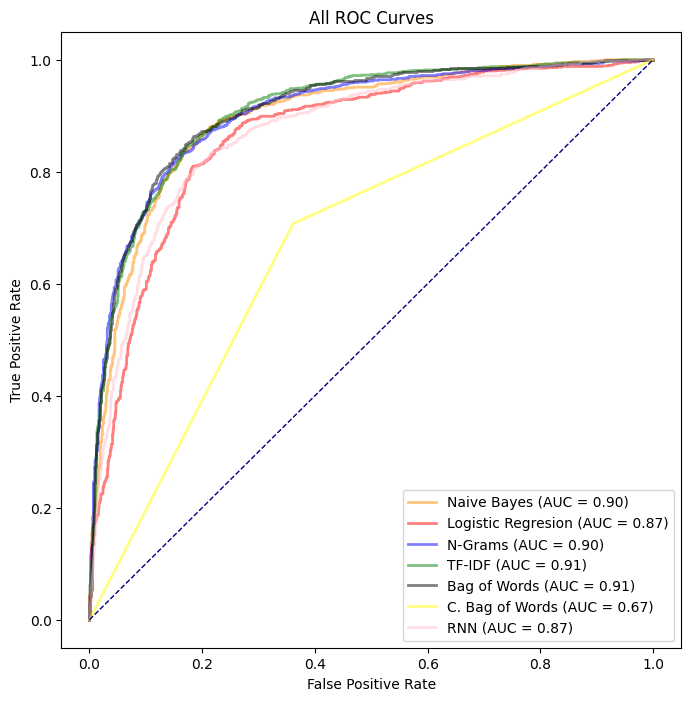

In [86]:
plt.figure(figsize=(8, 8))
plt.plot(False_pr_NB, True_pr_NB, color='darkorange', lw=2, label='Naive Bayes (AUC = {:.2f})'.format(ROC_AUC_NB) , alpha=0.5)
plt.plot(False_pr_LOG, True_pr_LOG, color='red', lw=2, label='Logistic Regresion (AUC = {:.2f})'.format(ROC_AUC_LOG), alpha=0.5)
plt.plot(False_pr_NGRM, True_pr_NGRM, color='blue', lw=2, label='N-Grams (AUC = {:.2f})'.format(ROC_AUC_NGRM), alpha=0.5)
plt.plot(False_pr_TF_IDF, True_pr_TF_IDF, color='green', lw=2, label='TF-IDF (AUC = {:.2f})'.format(ROC_AUC_TF_IDF), alpha=0.5)
plt.plot(False_pr_BoW, True_pr_BoW, color='black', lw=2, label='Bag of Words (AUC = {:.2f})'.format(ROC_AUC_BoW), alpha=0.5)
plt.plot(CBoW_fpr, CBoW_tpr , color='yellow', lw=2, label='C. Bag of Words (AUC = {:.2f})'.format(CBoW_roc_auc), alpha=0.5)
plt.plot(fpr, tpr , color='pink', lw=2, label='RNN (AUC = {:.2f})'.format(roc_auc), alpha=0.5)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('All ROC Curves')
plt.legend(loc='lower right')
plt.show()